In [8]:
import numpy as np
from scipy.sparse import diags
from scipy.sparse.linalg import eigs
from scipy.sparse import diags, bmat
import matplotlib.pyplot as plt
import time


def compute_eigenvalues(mu=0.2, md=1.1, L1=60, L2=60, N=120, k=10, tol=1e-7, maxiter=10000):
    """
    Computes the eigenvalues of a differential equation using finite differences.
    
    Parameters:
        mu (float): Parameter for the equation.
        md (float): Parameter for the equation.
        L1 (int): Left boundary of the domain.
        L2 (int): Right boundary of the domain.
        N (int): Number of grid points.
        k (int): Number of eigenvalues to compute.
        tol (float): Tolerance for the eigenvalue solver.
        maxiter (int): Maximum number of iterations.
    
    Returns:
        eigvals (array): Computed eigenvalues.
        elapsed_time (float): Time taken for computation.
    """
    start_total = time.time()
    
    # Define spatial grid
    x_min, x_max = -L1, L2
    x = np.linspace(x_min, x_max, N)
    dx = x[1] - x[0]
    
    # Define r(x) as a piecewise function
    coupling_x = np.where(x < 0, 0, (mu / md) ** 2 - 1)
    
    # Define differential operators using sparse matrices
    D2 = diags([1, -2, 1], [-1, 0, 1], shape=(N, N), format="csc") / dx**2  
    D1 = diags([-1, 1], [-1, 1], shape=(N, N), format="csc") / (2 * dx)
    
    # Compute diagonal terms
    C_diag = diags(1 + coupling_x, format="csc")
    
    # Define A and B matrices
    A = -0.5 * D2 - 1j * mu * D1 + C_diag
    B = 0.5 * D2 - 1j * mu * D1 - C_diag
    
    # Construct M as a sparse block matrix
    M = bmat([[A, C_diag], [-C_diag, B]], format="csc")
    
    start_solver = time.time()
    eigvals, eigvecs = eigs(M, k=k, which='SM', tol=tol, maxiter=maxiter)
    end_solver = time.time()
    
    elapsed_time = end_solver - start_solver
    print(f"Computation Time: {elapsed_time:.4f} seconds")
    print("Eigenvalues:", eigvals)
    
    return eigvals, elapsed_time
compute_eigenvalues()

KeyboardInterrupt: 

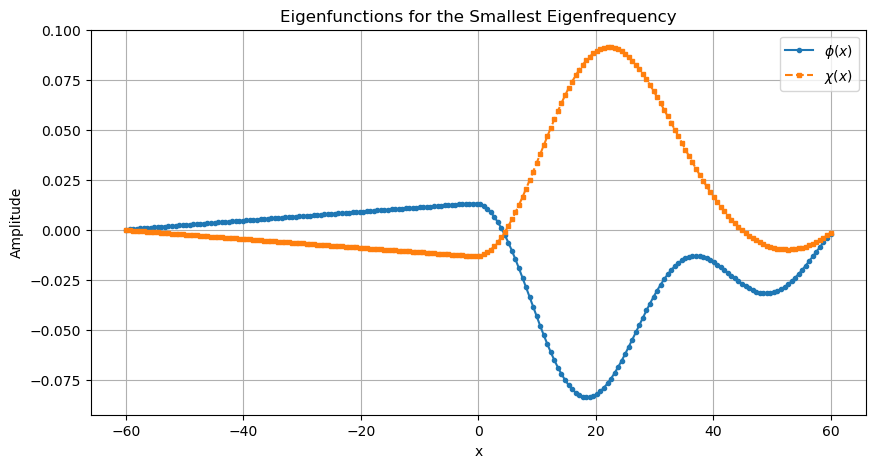

In [4]:
# Extract the eigenvector corresponding to the smallest eigenvalue
idx_smallest = np.argmin(np.abs(eigvals))  
eigvec = eigvecs[:, idx_smallest]  

# Split into two components (corresponding to the block matrix structure)
phi_values = np.real(eigvec[:N])  
chi_values = np.real(eigvec[N:])  

# Plot the eigenfunctions
plt.figure(figsize=(10, 5))
plt.plot(x, phi_values, label=r'$\phi(x)$', linestyle='-', marker='o', markersize=3)
plt.plot(x, chi_values, label=r'$\chi(x)$', linestyle='--', marker='s', markersize=3)
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.title('Eigenfunctions for the Smallest Eigenfrequency')
plt.legend()
plt.grid(True)
plt.show()


In [43]:
import numpy as np
from scipy.sparse import diags, bmat, eye
from scipy.sparse.linalg import eigs
import time

total = time.time()
# Define parameters
mu = 0.2
md = 1.1
L1 = 60
L2 = 60

# Define r(x) as a piecewise function
def coupling(x):
    return np.where(x < 0, 0, (mu / md) ** 2 - 1)

# Define interval of derivatives
x_min, x_max, N = -L1, L2, 120
x = np.linspace(x_min, x_max, N)
dx = x[1] - x[0]

# Define differential operators using sparse matrices
D2 = diags([1, -2, 1], [-1, 0, 1], shape=(N, N), format="csc") / dx**2  
D1 = diags([-1, 1], [-1, 1], shape=(N, N), format="csc") / (2 * dx)

# Compute diagonal terms
coupling_x = coupling(x)
C_diag = diags(1 + coupling_x, format="csc")

# Define A and B matrices
A = -0.5 * D2 - 1j * mu * D1 + C_diag
B = 0.5 * D2 - 1j * mu * D1 - C_diag

# Construct M as a sparse block matrix
M = bmat([[A, C_diag], [-C_diag, B]], format="csc")

start = time.time()

# Solve for eigenvalues (try which='SR' instead of 'SM' for speed)
eigvals, eigvecs = eigs(M, k=10, which='SM', tol=1e-6, maxiter=1000000, ncv=20)
end = time.time()
# Display the eigenvalues
print(end-start)
print("Eigenvalues:", eigvals)


14.274821996688843
Eigenvalues: [ 0.02857614-1.77127735e-13j  0.01620974+8.51761052e-15j
 -0.01620974-8.35327223e-14j  0.00690292-3.17893016e-15j
 -0.00690292-9.11736107e-15j  0.00127872-3.78831394e-13j
  0.00085185+1.80069399e-12j -0.00127872+1.36889729e-12j
 -0.00085185-6.72796808e-13j -0.02857614-3.56874891e-11j]


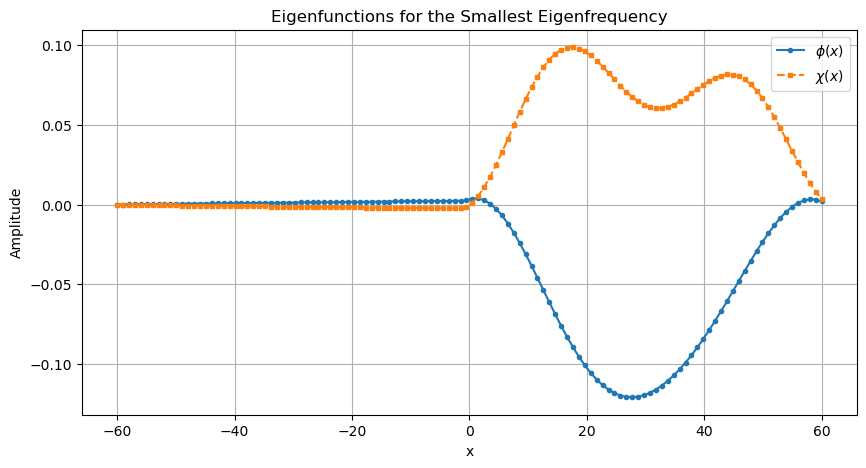

In [27]:
# Extract the eigenvector corresponding to the smallest eigenvalue
idx_smallest = np.argmin(np.abs(eigvals))  
eigvec = eigvecs[:, idx_smallest]  

# Split into two components (corresponding to the block matrix structure)
phi_values = np.real(eigvec[:N])  
chi_values = np.real(eigvec[N:])  

# Plot the eigenfunctions
plt.figure(figsize=(10, 5))
plt.plot(x, phi_values, label=r'$\phi(x)$', linestyle='-', marker='o', markersize=3)
plt.plot(x, chi_values, label=r'$\chi(x)$', linestyle='--', marker='s', markersize=3)
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.title('Eigenfunctions for the Smallest Eigenfrequency')
plt.legend()
plt.grid(True)
plt.show()

Computation Time: 6.5956 seconds
Eigenvalues: [-0.01620974-4.14940265e-17j -0.00690292+7.00746446e-16j
  0.00690292-7.40279056e-17j -0.00127872+4.63479484e-16j
 -0.00085185+2.84664501e-15j  0.00127872-3.56137112e-15j
  0.00085185+3.86510581e-15j  0.01620974+8.24817431e-16j
  0.02857614+5.69085728e-13j -0.02857614-7.82925040e-11j]
Computation Time: 5.5790 seconds
Eigenvalues: [-0.02857614+1.71118707e-13j -0.01620974+5.26327678e-16j
  0.01620974+8.80465368e-16j -0.00690292-1.81381386e-14j
  0.00690292-2.03904352e-15j -0.00127872-5.13511856e-14j
 -0.00085185-5.32837578e-14j  0.00085185+7.14292633e-14j
  0.00127872-8.35731077e-14j  0.02857614+9.02986365e-11j]
Computation Time: 14.1951 seconds
Eigenvalues: [ 0.01620974+2.62810607e-16j -0.01620974-1.42176852e-15j
 -0.00690292+4.70535334e-16j  0.00690292-4.76480964e-16j
 -0.00127872-1.95476137e-16j -0.00085185+2.11016973e-15j
  0.00127872+5.12224810e-15j  0.00085185+1.01949237e-15j
 -0.02857614-1.75234352e-12j  0.02857614-1.44636880e-13j]
Com

/opt/conda/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/conda/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


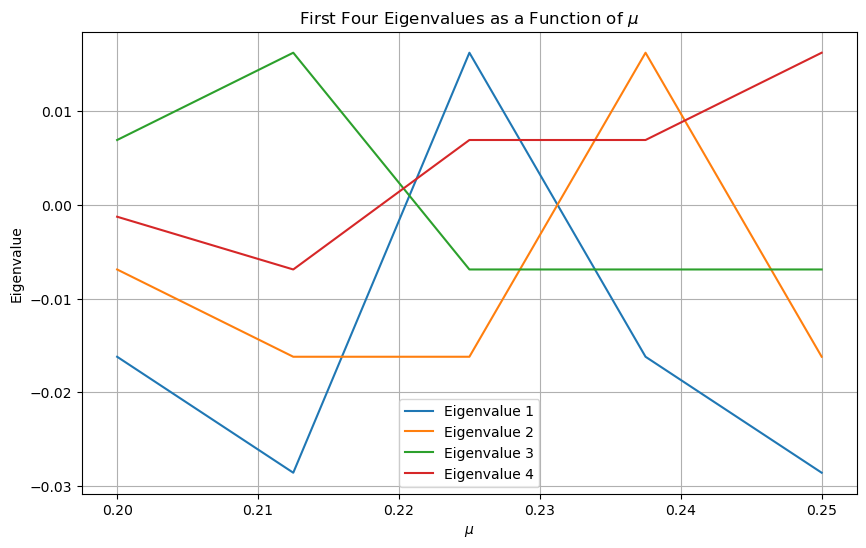

In [37]:
# Define range for mu values
mu_values = np.linspace(0.2, 0.25, 5)  # Vary mu from 0.5 to 0.9
eigenvalue_results = []

# Loop over mu values and compute eigenvalues
for mu in mu_values:
    eigvs, _ = compute_eigenvalues()
    eigenvalue_results.append(eigvs)
# Convert results to numpy array for plotting
eigenvalue_results = np.array(eigenvalue_results)

# Plot the first four eigenvalues as a function of mu
plt.figure(figsize=(10, 6))
for i in range(4):
    plt.plot(mu_values, eigenvalue_results[:, i], label=f"Eigenvalue {i+1}")

plt.xlabel(r"$\mu$")
plt.ylabel("Eigenvalue")
plt.title("First Four Eigenvalues as a Function of $\mu$")
plt.legend()
plt.grid(True)
plt.show()


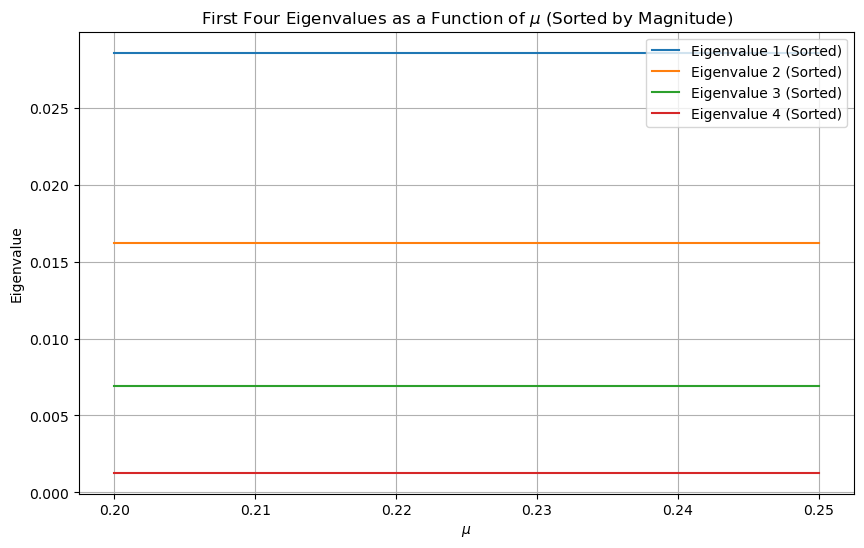

In [38]:
# Sort eigenvalues in descending order for each mu value
eigenvalue_results_sorted = np.sort(eigenvalue_results)[:, ::-1]  # Sort each row in descending order

# Plot the first four eigenvalues as a function of mu, now ordered
plt.figure(figsize=(10, 6))
for i in range(4):
    plt.plot(mu_values, eigenvalue_results_sorted[:, i], label=f"Eigenvalue {i+1} (Sorted)")

plt.xlabel(r"$\mu$")
plt.ylabel("Eigenvalue")
plt.title("First Four Eigenvalues as a Function of $\mu$ (Sorted by Magnitude)")
plt.legend()
plt.grid(True)
plt.show()


In [15]:

def rr(x, y, mu, md):
    """Computes the coupling function based on x and y."""
    return np.where(x < 0, 0, (mu / (md + y)) ** 2 - 1)

# Define range for y values (y = (i - 1) / 100000)
y_values = np.linspace(99 / 100000, 39999 / 100000, 50)  # Using 50 steps for efficiency
eigenvalue_results_y = []

# Loop over y values and compute eigenvalues
for y in y_values:
    # Compute the coupling function rr(x, y)
    coupling_x = rr(x, y, mu, md)
    
    # Recompute matrices with the updated rr(x, y)
    A = -0.5 * D2 - 1j * mu * D1 + np.diag(1 + coupling_x)
    B = 0.5 * D2 - 1j * mu * D1 - np.diag(1 + coupling_x)
    
    # Construct block matrix
    M = np.block([[A, np.diag(1 + coupling_x)], [np.diag(1 + coupling_x), B]])
    
    # Compute eigenvalues
    eigvals, _ = eigs(M, k=4, which='SM')  # Get first 4 eigenvalues
    
    # Store real parts of eigenvalues
    eigenvalue_results_y.append(np.real(eigvals))

# Convert results to numpy array for plotting
eigenvalue_results_y = np.array(eigenvalue_results)

# Plot the first four eigenvalues as a function of mu
plt.figure(figsize=(10, 6))
for i in range(4):
    plt.plot(y_values, eigenvalue_results_y[:, i], label=f"Eigenvalue {i+1}")

plt.xlabel(r"$\mu$")
plt.ylabel("Eigenvalue")
plt.title("First Four Eigenvalues as a Function of $\mu$")
plt.legend()
plt.grid(True)
plt.show()


KeyboardInterrupt: 

In [ ]:
# Sort eigenvalues in descending order for each mu value
eigenvalue_results_sorted = np.sort(eigenvalue_results_y)[:, ::-1]  # Sort each row in descending order

# Plot the first four eigenvalues as a function of mu, now ordered
plt.figure(figsize=(10, 6))
for i in range(4):
    plt.plot(y_values, eigenvalue_results_sorted[:, i], label=f"Eigenvalue {i+1} (Sorted)")

plt.xlabel(r"$\mu$")
plt.ylabel("Eigenvalue")
plt.title("First Four Eigenvalues as a Function of $\mu$ (Sorted by Magnitude)")
plt.legend()
plt.grid(True)
plt.show()


In [1]:
import numpy as np
from scipy.sparse import diags, lil_matrix
from scipy.sparse.linalg import eigs
import matplotlib.pyplot as plt

# Define parameters
mu = 0.2
md = 1.1
L1 = 60
L2 = 60

# Define r(x) as a piecewise function
def coupling(x):
    return np.where(x < 0, 0, (mu / md) ** 2 - 1)

# Define interval of derivatives
x_min, x_max, N = -L1, L2, 150 
x = np.linspace(x_min, x_max, N)
dx = x[1] - x[0]

# Define periodic finite difference matrices
D2 = lil_matrix((N, N))  # Second derivative
D1 = lil_matrix((N, N))  # First derivative

# Fill in the finite difference matrices with periodic boundary conditions
for i in range(N):
    D2[i, (i - 1) % N] = 1  # Left neighbor (modulo for periodicity)
    D2[i, i] = -2  # Center
    D2[i, (i + 1) % N] = 1  # Right neighbor
    
    D1[i, (i - 1) % N] = -0.5  # Backward difference
    D1[i, (i + 1) % N] = 0.5   # Forward difference

D2 /= dx**2
D1 /= dx

# Convert to sparse matrix format
D2 = D2.tocsr()
D1 = D1.tocsr()

# Calculate the derivative matrix
coupling_x = coupling(x)
I = np.eye(N)
A = -0.5 * D2 - 1j * mu * D1 + np.diag(1 + coupling_x)  # First equation
B = 0.5 * D2 - 1j * mu * D1 - np.diag(1 + coupling_x)  # Second equation

# Combine into a block matrix
M = np.block([[A, np.diag(1 + coupling_x)], [np.diag(1 + coupling_x), B]])

# Solve for eigenvalues
eigvals, eigvecs = eigs(M, k=50, which='SM', tol=1e-7,maxiter=1000000)  # Find 10 smallest eigenvalues

# Display the eigenvalues
print("Eigenvalues:", eigvals)


KeyboardInterrupt: 

In [ ]:
# Extract the eigenvector corresponding to the smallest eigenvalue
idx_smallest = np.argmin(np.abs(eigvals))  # Index of the smallest eigenvalue
eigvec = eigvecs[:, idx_smallest]  # Corresponding eigenvector

# Split into two components (corresponding to the block matrix structure)
phi_values = np.real(eigvec[:N])  # First N values correspond to φ(x)
chi_values = np.real(eigvec[N:])  # Next N values correspond to χ(x)

# Plot the eigenfunctions
plt.figure(figsize=(10, 5))
plt.plot(x, phi_values, label=r'$\phi(x)$', linestyle='-', marker='o', markersize=3)
plt.plot(x, chi_values, label=r'$\chi(x)$', linestyle='--', marker='s', markersize=3)
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.title('Eigenfunctions for the Smallest Eigenfrequency')
plt.legend()
plt.grid(True)
plt.show()



In [2]:
import numpy as np
from scipy.sparse import diags, lil_matrix
from scipy.sparse.linalg import eigs
import matplotlib.pyplot as plt

# Define parameters
mu = 0.2
md = 1.1
L1 = 60
L2 = 60

# Define r(x) as a piecewise function
def coupling(x):
    return np.where(x < 0, 0, (mu / md) ** 2 - 1)

# Define interval of derivatives
x_min, x_max, N = -L1, L2, 160 
x = np.linspace(x_min, x_max, N)
dx = x[1] - x[0]

# Define Neumann finite difference matrices
D2 = lil_matrix((N, N))  # Second derivative
D1 = lil_matrix((N, N))  # First derivative

# finite difference matrices with Neumann boundary conditions
for i in range(1, N - 1):
    D2[i, i - 1] = 1  
    D2[i, i] = -2  
    D2[i, i + 1] = 1  
    
    D1[i, i - 1] = -0.5 
    D1[i, i + 1] = 0.5  

# Neumann boundary conditions (zero derivative at boundaries)
D2[0, 0] = -2; D2[0, 1] = 2
D2[-1, -1] = -2; D2[-1, -2] = 2 

D1[0, 0] = 0; D1[0, 1] = 0  
D1[-1, -1] = 0; D1[-1, -2] = 0 

D2 /= dx**2
D1 /= dx

# Convert to sparse matrix format
D2 = D2.tocsr()
D1 = D1.tocsr()

# Calculate the derivative matrix
coupling_x = coupling(x)
I = np.eye(N)
A = -0.5 * D2 - 1j * mu * D1 + np.diag(1 + coupling_x)  # First equation
B = 0.5 * D2 - 1j * mu * D1 - np.diag(1 + coupling_x)  # Second equation

# Combine into a block matrix
M = np.block([[A, np.diag(1 + coupling_x)], [np.diag(1 + coupling_x), B]])

# Solve for eigenvalues
eigvals, eigvecs = eigs(M, k=40, which='SM',tol=1e-7,maxiter=100000)  # Find 10 smallest eigenvalues

# Display the eigenvalues
print("Eigenvalues:", eigvals)


Eigenvalues: [ 0.50491492-0.00242801j  0.45823163-0.00252034j  0.4135903 -0.00260975j
  0.37106565-0.00269631j -0.50491492-0.00242801j -0.45823163-0.00252034j
 -0.4135903 -0.00260975j  0.33073053-0.00278022j -0.37106565-0.00269631j
 -0.33073053-0.00278022j  0.29265636-0.00286177j -0.29265636-0.00286177j
  0.25691354-0.00294146j  0.22357201-0.00302013j -0.25691354-0.00294146j
 -0.22357201-0.00302013j  0.1927015 -0.00309927j -0.1927015 -0.00309927j
  0.16437105-0.00318158j -0.16437105-0.00318158j -0.13864618-0.00327244j
  0.13864618-0.00327244j -0.1155816 -0.00338304j  0.1155816 -0.00338304j
 -0.09520706-0.00353781j -0.07751465-0.00379169j  0.09520706-0.00353781j
 -0.06250886-0.00427369j -0.0506989 -0.00506933j -0.04228721-0.00414412j
 -0.0342283 -0.00206527j -0.02362444-0.00020135j -0.02770283-0.00083913j
  0.07751465-0.00379169j  0.06250886-0.00427369j  0.0506989 -0.00506933j
  0.04228721-0.00414412j  0.02362444-0.00020135j  0.02770283-0.00083913j
  0.0342283 -0.00206527j]


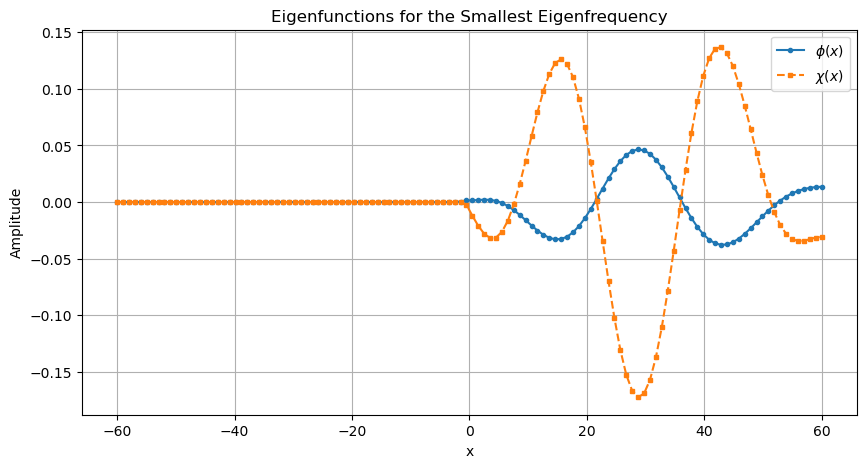

In [9]:
# Extract the eigenvector corresponding to the smallest eigenvalue
idx_smallest = np.argmin(np.abs(eigvals))  # Index of the smallest eigenvalue
eigvec = eigvecs[:, idx_smallest]  # Corresponding eigenvector

# Split into two components (corresponding to the block matrix structure)
phi_values = np.real(eigvec[:N]) 
chi_values = np.real(eigvec[N:])  

# Plot the eigenfunctions
plt.figure(figsize=(10, 5))
plt.plot(x, phi_values, label=r'$\phi(x)$', linestyle='-', marker='o', markersize=3)
plt.plot(x, chi_values, label=r'$\chi(x)$', linestyle='--', marker='s', markersize=3)
plt.xlabel('x')
plt.ylabel('Amplitude')
plt.title('Eigenfunctions for the Smallest Eigenfrequency')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
!pip install dolfin

ERROR: Could not find a version that satisfies the requirement dolfin (from versions: none)
ERROR: No matching distribution found for dolfin


In [7]:
!pip3 install --user fenics-ffc --upgrade

In [8]:
from dolfin import *
import numpy as np
import time

# Function to compute eigenvalues using FEniCS finite element method
def compute_eigenvalues_fenics(mu=0.2, md=1.1, L1=60, L2=60, N=120, k=10):
    start_total = time.time()
    
    # Define mesh and function space
    mesh = IntervalMesh(N, -L1, L2)
    V = FunctionSpace(mesh, "CG", 1)  # Continuous Galerkin (CG) elements of degree 1
    
    # Define the piecewise function r(x)
    class CouplingFunction(UserExpression):
        def eval(self, values, x):
            values[0] = 0 if x[0] < 0 else (mu / md) ** 2 - 1
        def value_shape(self):
            return ()
    
    coupling_x = CouplingFunction(degree=1)
    
    # Define trial and test functions
    u = TrialFunction(V)
    v = TestFunction(V)
    
    # Define the bilinear form (weak formulation of eigenvalue problem)
    a = (-0.5 * inner(grad(u), grad(v)) - 1j * mu * inner(u.dx(0), v)) * dx
    m = (0.5 * inner(grad(u), grad(v)) - 1j * mu * inner(u.dx(0), v) - coupling_x * u * v) * dx
    
    # Assemble matrices
    A = assemble(a)
    M = assemble(m)
    
    # Convert to PETSc format
    A_mat = as_backend_type(A).mat()
    M_mat = as_backend_type(M).mat()
    
    # Solve for eigenvalues using SLEPc
    from slepc4py import SLEPc
    eig_solver = SLEPc.EPS().create()
    eig_solver.setOperators(A_mat, M_mat)
    eig_solver.setProblemType(SLEPc.EPS.ProblemType.GHEP)  # Generalized Hermitian eigenvalue problem
    eig_solver.setWhichEigenpairs(SLEPc.EPS.Which.SMALLEST_REAL)
    eig_solver.setDimensions(k, PETSc.DECIDE)
    eig_solver.solve()
    
    # Extract eigenvalues
    eigvals = []
    for i in range(eig_solver.getConverged()):
        eigval = eig_solver.getEigenvalue(i)
        eigvals.append(eigval)
    
    eigvals = np.array(eigvals)
    end_solver = time.time()
    elapsed_time = end_solver - start_total
    
    print(f"Computation Time: {elapsed_time:.4f} seconds")
    print("Eigenvalues:", eigvals)
    
    return eigvals, elapsed_time

# Run the function
compute_eigenvalues_fenics()


ModuleNotFoundError: No module named 'dolfin'

In [13]:
pip install petsc4py slepc4py


  Using cached petsc4py-3.22.3-cp311-cp311-linux_x86_64.whl
  Using cached slepc4py-3.22.2-cp311-cp311-linux_x86_64.whl
  Using cached petsc-3.22.3-py3-none-linux_x86_64.whl
  Using cached slepc-3.22.2-py3-none-linux_x86_64.whl
Note: you may need to restart the kernel to use updated packages.


In [7]:
from petsc4py import PETSc
from slepc4py import SLEPc
import numpy as np
from scipy.sparse import diags

def compute_eigenvalues_petsc(mu=0.2, md=1.1, L1=60, L2=60, N=500, k=10, tol=1e-7, maxiter=10000):
    # Define spatial grid
    x_min, x_max = -L1, L2
    x = np.linspace(x_min, x_max, N)
    dx = x[1] - x[0]

    # Define r(x) as a piecewise function
    coupling_x = np.where(x < 0, 0, (mu / md) ** 2 - 1)

    # Define differential operators using sparse matrices
    D2 = diags([1, -2, 1], [-1, 0, 1], shape=(N, N), format="csc") / dx**2  
    D1 = diags([-1, 1], [-1, 1], shape=(N, N), format="csc") / (2 * dx)

    # Compute diagonal terms
    C_diag = diags(1 + coupling_x, format="csc")

    # Define A and B matrices
    A = -0.5 * D2 - 1j * mu * D1 + C_diag
    B = 0.5 * D2 - 1j * mu * D1 - C_diag

    # Construct PETSc complex-valued matrix
    size = 2 * N
    M = PETSc.Mat().createAIJ([size, size], comm=PETSc.COMM_WORLD)
    M.setType(PETSc.Mat.Type.AIJ)
    M.setOption(PETSc.Mat.Option.HERMITIAN, True)
    M.setUp()

    # Populate matrix using PETSc's setValues()
    for i in range(N):
        for j in range(N):
            M.setValues(i, j, A[i, j].real + 1j * A[i, j].imag)
            M.setValues(i + N, j + N, B[i, j].real + 1j * B[i, j].imag)

        M.setValues(i, i + N, C_diag[i, i].real + 1j * C_diag[i, i].imag)
        M.setValues(i + N, i, -C_diag[i, i].real - 1j * C_diag[i, i].imag)

    M.assemble()

    # Set up eigenvalue solver
    eps = SLEPc.EPS().create()
    eps.setOperators(M)
    eps.setProblemType(SLEPc.EPS.ProblemType.GNHEP)  # Generalized Non-Hermitian Eigenvalue Problem
    eps.setWhichEigenpairs(SLEPc.EPS.Which.SMALLEST_MAGNITUDE)
    eps.setTolerances(tol, maxiter)
    eps.setDimensions(k, PETSc.DECIDE)
    eps.solve()

    # Extract eigenvalues
    eigvals = []
    for i in range(eps.getConverged()):
        eigval = eps.getEigenvalue(i)
        eigvals.append(eigval)

    eigvals = np.array(eigvals)

    print("Eigenvalues:", eigvals)
    return eigvals
compute_eigenvalues_petsc()

/tmp/ipykernel_1020/2784208551.py:36: ComplexWarning: Casting complex values to real discards the imaginary part
  M.setValues(i, j, A[i, j].real + 1j * A[i, j].imag)
/tmp/ipykernel_1020/2784208551.py:37: ComplexWarning: Casting complex values to real discards the imaginary part
  M.setValues(i + N, j + N, B[i, j].real + 1j * B[i, j].imag)
/tmp/ipykernel_1020/2784208551.py:39: ComplexWarning: Casting complex values to real discards the imaginary part
  M.setValues(i, i + N, C_diag[i, i].real + 1j * C_diag[i, i].imag)
/tmp/ipykernel_1020/2784208551.py:40: ComplexWarning: Casting complex values to real discards the imaginary part
  M.setValues(i + N, i, -C_diag[i, i].real - 1j * C_diag[i, i].imag)


Eigenvalues: [-0.00625709+0.j  0.00625709+0.j -0.01553329+0.j  0.01553329+0.j
  0.02609539+0.j -0.02609539+0.j  0.03768021+0.j -0.03768021+0.j
 -0.04815095+0.j  0.04815095+0.j -0.05556133+0.j]


array([-0.00625709+0.j,  0.00625709+0.j, -0.01553329+0.j,  0.01553329+0.j,
        0.02609539+0.j, -0.02609539+0.j,  0.03768021+0.j, -0.03768021+0.j,
       -0.04815095+0.j,  0.04815095+0.j, -0.05556133+0.j])